In [1]:
from pandas_datareader import data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Northrop Grumman':'NOC',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electrics':'GE',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC'}

In [3]:
companies = sorted(companies_dict.items(), key=lambda x: x[1])

In [4]:
len(companies)

24

In [5]:
data_source = "yahoo" # Source of data is yahoo finance.
start_date = "2017-01-01"
end_date = "2019-01-01"
df = data.DataReader(list(companies_dict.values()),data_source,start_date,end_date)
df.head()

Attributes   Adj Close                                                \
Symbols           AMZN       AAPL        WBA         NOC          BA   
Date                                                                   
2017-01-03  753.669983  27.372362  72.434296  218.657150  145.533676   
2017-01-04  757.179993  27.341724  72.451767  218.992264  147.063477   
2017-01-05  780.450012  27.480770  72.495415  219.681137  147.146927   
2017-01-06  795.989990  27.787130  72.556534  220.369980  147.508514   
2017-01-09  796.919983  28.041647  72.076317  219.513580  146.785309   

Attributes                                                            ...  \
Symbols            LMT         MCD       INTC         IBM        TXN  ...   
Date                                                                  ...   
2017-01-03  225.550034  107.097153  32.440598  136.249847  64.976089  ...   
2017-01-04  226.155518  106.971786  32.272194  137.936768  64.896614  ...   
2017-01-05  227.927414  107.168755  32.219013  137.480408  64.393265  ...   
2017-01-06  229.592468  108.117798  32.334232  138.156799  65.479454  ...   
2017-01-09  229.556885  107.822342  32.449463  136.624695  65.647224  ...   

Attributes     Volume                                                         \
Symbols           PEP          KO        JNJ        TM       HMC         XOM   
Date                                                                           
2017-01-03  3741200.0  14711000.0  5953000.0  204000.0  864500.0  10360600.0   
2017-01-04  3029700.0   9959400.0  5828900.0  250600.0  705500.0   9434200.0   
2017-01-05  5087200.0   8968300.0  6217200.0  525900.0  482600.0  14443200.0   
2017-01-06  4109700.0  10246600.0  5221400.0  171600.0  493600.0  16518100.0   
2017-01-09  5603500.0  14822500.0  5457500.0  135800.0  585200.0  13762300.0   

Attributes                                                
Symbols           CVX        VLO           F         BAC  
Date                                                      
2017-01-03  7404800.0  4425000.0  40510800.0  99298100.0  
2017-01-04  6679900.0  7431000.0  77638100.0  76875100.0  
2017-01-05  5928600.0  6450600.0  75628400.0  86826400.0  
2017-01-06  4762500.0  3771700.0  40315900.0  66281500.0  
2017-01-09  6891800.0  5132600.0  39438400.0  75901500.0  

[5 rows x 144 columns]

In [6]:
# Find Stock Open and Close Values
stock_close = df['Close']
stock_open = df['Open']

print(stock_close.iloc[0])

Symbols
AMZN    753.669983
AAPL     29.037500
WBA      82.959999
NOC     234.889999
BA      156.970001
LMT     253.309998
MCD     119.620003
INTC     36.599998
IBM     167.190002
TXN      73.580002
MA      105.389999
MSFT     62.580002
GE      243.769226
AXP      75.349998
PEP     104.650002
KO       41.799999
JNJ     115.839996
TM      118.550003
HMC      29.610001
XOM      90.889999
CVX     117.849998
VLO      70.419998
F        12.590000
BAC      22.530001
Name: 2017-01-03 00:00:00, dtype: float64


In [7]:
stock_open = np.array(df["Open"]).T # stock_open is numpy array of transpose of df['Open']
stock_close = np.array(df["Close"]).T # stock_close is numpy array of transpose of df['Close']

In [8]:
row, col = stock_close.shape

# create movements dataset filled with 0's
movements = np.zeros([row, col])

for i in range(0, row):
    movements[i,:] = np.subtract(stock_close[i,:], stock_open[i,:])

In [9]:
for i in range(0, len(companies)):
    print('Company: {} , Change: {}'.format(companies[i][0], sum(movements[i][:])))

Company: Apple , Change: -616.2402954101562
Company: Amazon , Change: 3.0224952697753906
Company: American Express , Change: -11.829998016357422
Company: Boeing , Change: -63.08050537109375
Company: Bank of America , Change: 6.760162353515625
Company: Chevron , Change: -103.93986511230469
Company: Ford , Change: 9.919944763183594
Company: General Electrics , Change: 1.0100440979003906
Company: Honda , Change: -60.99986267089844
Company: IBM , Change: 9.060043334960938
Company: Intel , Change: 9.209991455078125
Company: Johnson & Johnson , Change: -14.720012664794922
Company: Coca Cola , Change: -173.3076515197754
Company: Lockheed Martin , Change: -13.059906005859375
Company: MasterCard , Change: 7.080047607421875
Company: McDonalds , Change: 5.6599884033203125
Company: Microsoft , Change: 13.929946899414062
Company: Northrop Grumman , Change: -25.289901733398438
Company: Pepsi , Change: -8.289995193481445
Company: Toyota , Change: -21.4400634765625
Company: Texas Instruments , Change:

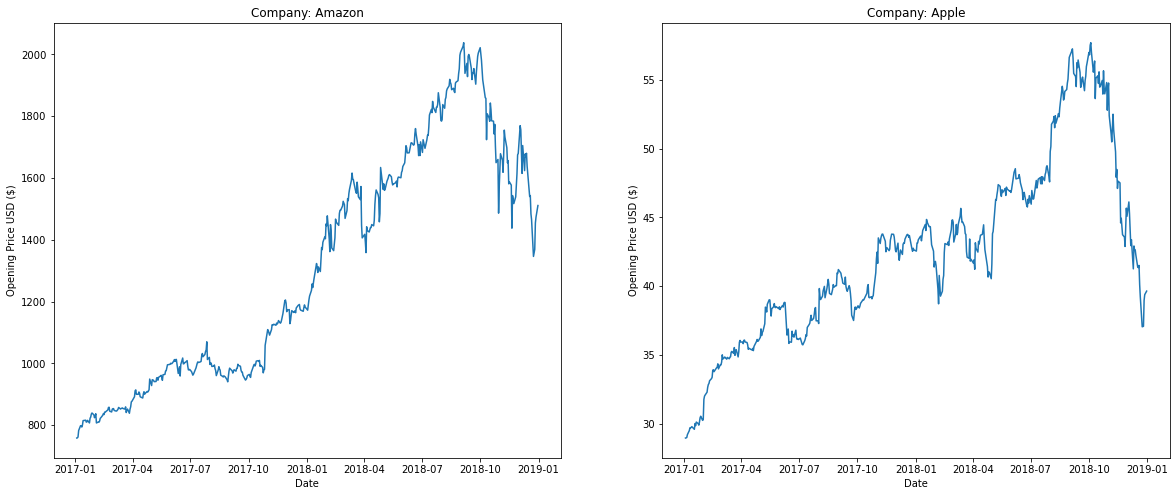

In [10]:
plt.figure(figsize = (20,8)) 
plt.subplot(1,2,1) 
plt.title("Company: Amazon")
plt.xlabel("Date")
plt.ylabel("Opening Price USD ($)")
plt.plot(df["Open"]["AMZN"])
plt.subplot(1,2,2) 
plt.title("Company: Apple")
plt.xlabel("Date")
plt.ylabel("Opening Price USD ($)")
plt.plot(df["Open"]["AAPL"])
plt.savefig('pic1.png', dpi=300, bbox_inches='tight')
plt.show()

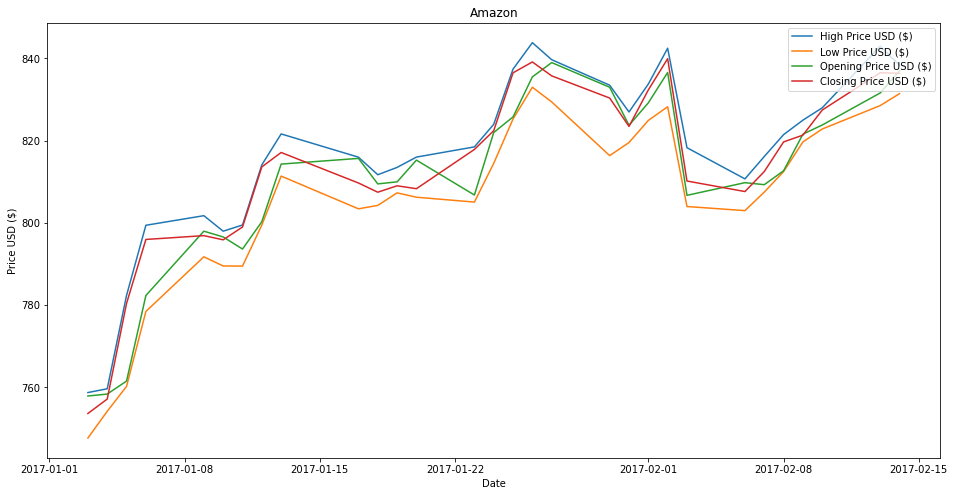

In [11]:
plt.figure(figsize = (16,8))
plt.title("Amazon")
plt.xlabel("Date")
plt.ylabel("Price USD ($)")
plt.plot(df.iloc[0:30]["High"]["AMZN"],label = "High Price USD ($)")
plt.plot(df.iloc[0:30]["Low"]["AMZN"],label = "Low Price USD ($)")
plt.plot(df.iloc[0:30]["Open"]["AMZN"],label = "Opening Price USD ($)")
plt.plot(df.iloc[0:30]["Close"]["AMZN"],label = "Closing Price USD ($)")
plt.legend(loc="upper right") # Properties of legend box
plt.savefig('pic2.png', dpi=300, bbox_inches='tight')
plt.show()

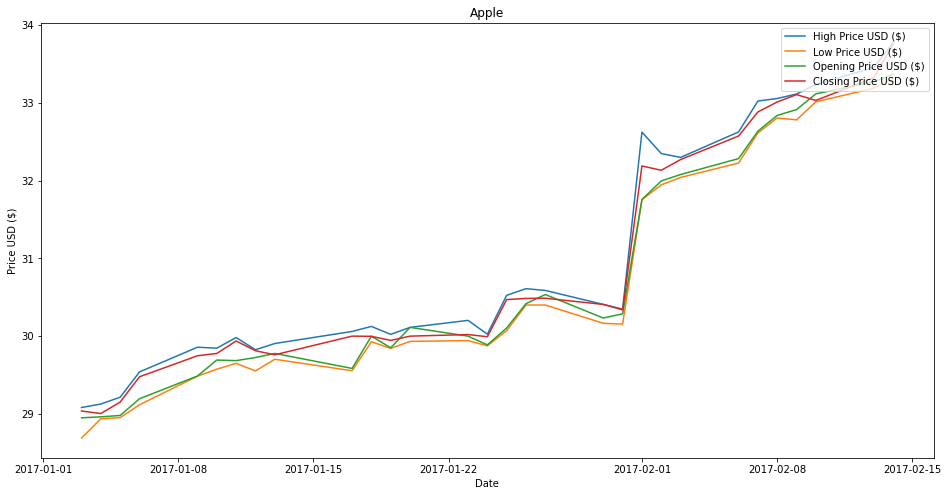

In [12]:
plt.figure(figsize = (16,8))
plt.title("Apple")
plt.xlabel("Date")
plt.ylabel("Price USD ($)")
plt.plot(df.iloc[0:30]["High"]["AAPL"],label = "High Price USD ($)")
plt.plot(df.iloc[0:30]["Low"]["AAPL"],label = "Low Price USD ($)")
plt.plot(df.iloc[0:30]["Open"]["AAPL"],label = "Opening Price USD ($)")
plt.plot(df.iloc[0:30]["Close"]["AAPL"],label = "Closing Price USD ($)")
plt.legend(loc="upper right") # Properties of legend box
plt.savefig('pic3.png', dpi=300, bbox_inches='tight')
plt.show()

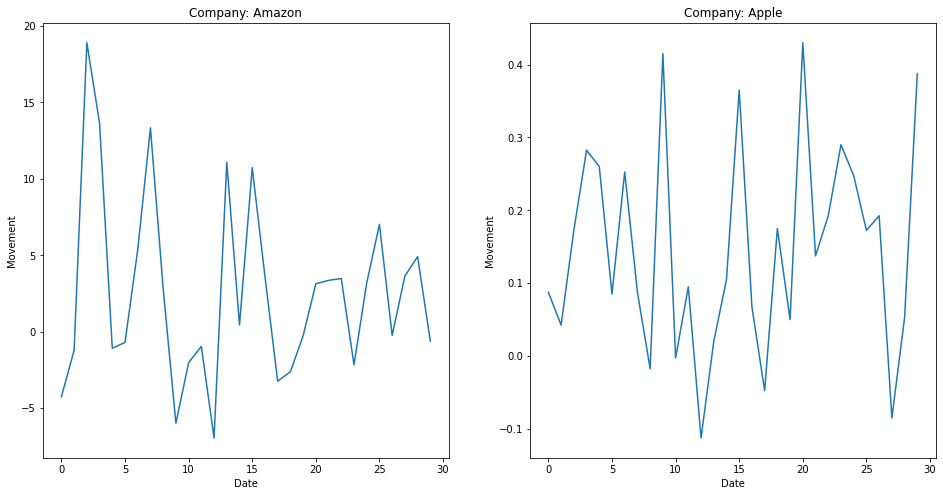

In [13]:
plt.figure(figsize = (16,8)) 
plt.subplot(1,2,1) 
plt.title("Company: Amazon")
plt.xlabel("Date")
plt.ylabel('Movement')
plt.plot(movements[0][0:30])
plt.subplot(1,2,2) 
plt.title("Company: Apple")
plt.xlabel("Date")
plt.ylabel('Movement')
plt.plot(movements[1][0:30])
plt.savefig('pic4.png', dpi=300, bbox_inches='tight')
plt.show()

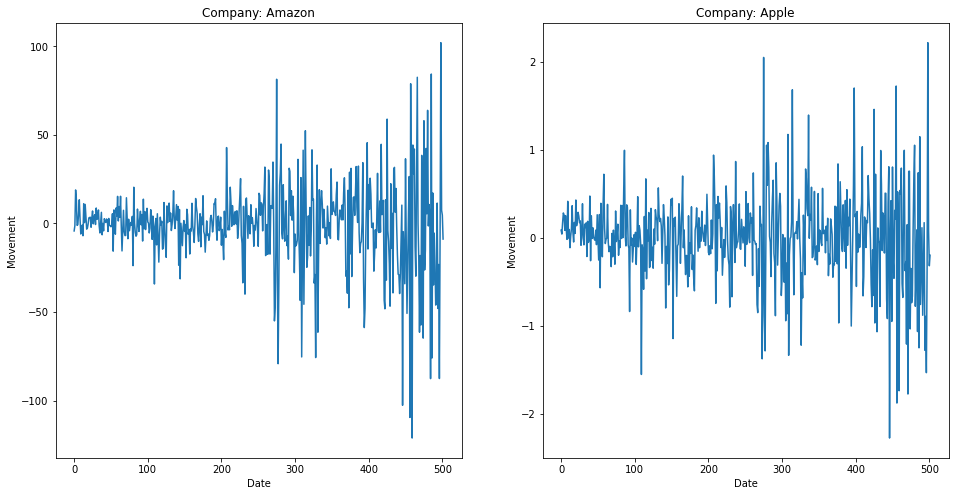

In [14]:
plt.figure(figsize = (16,8)) 
plt.subplot(1,2,1) 
plt.title("Company: Amazon")
plt.xlabel("Date")
plt.ylabel('Movement')
plt.plot(movements[0])
plt.subplot(1,2,2) 
plt.title("Company: Apple")
plt.xlabel("Date")
plt.ylabel('Movement')
plt.plot(movements[1])
plt.savefig('pic5.png', dpi=300, bbox_inches='tight')
plt.show()

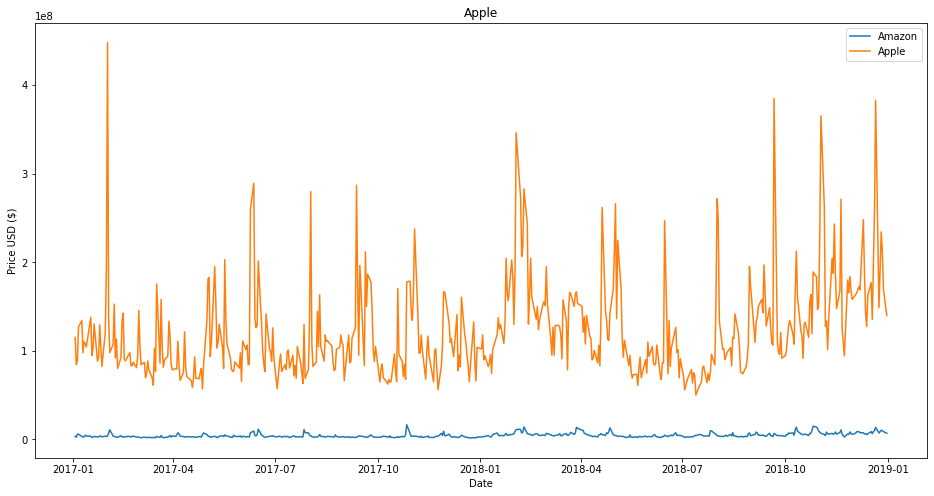

In [15]:
plt.figure(figsize = (16,8))
plt.title("Apple",)
plt.xlabel("Date")
plt.ylabel("Price USD ($)")
plt.plot(df["Volume"]["AMZN"],label = "Amazon")
plt.plot(df["Volume"]["AAPL"],label = "Apple")
plt.legend(loc="upper right") # Properties of legend box
plt.savefig('pic6.png', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer() # Define a Normalizer
norm_movements= normalizer.fit_transform(movements) # Fit and transform

In [17]:
print(norm_movements.min())
print(norm_movements.max())
print(norm_movements.mean())

-0.39516464170116167
0.28043582254264576
-0.0014961614404284556


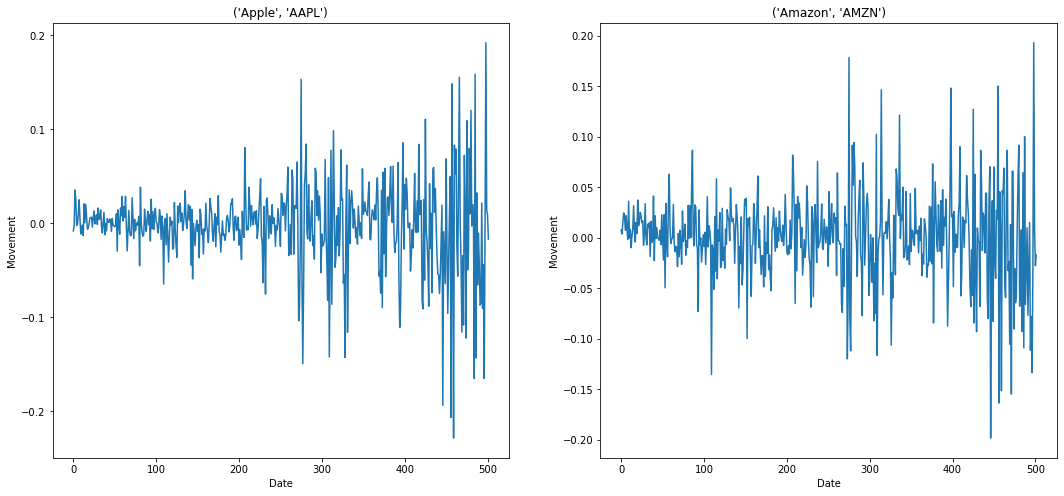

In [18]:
# Visualization - Plot Stock Movements
plt.clf
plt.figure(figsize=(18,8))
plt.subplot(1,2,1) 
plt.plot(norm_movements[0][:])
plt.xlabel("Date")
plt.ylabel('Movement')
plt.title(companies[0])

plt.subplot(1,2,2) 
plt.plot(norm_movements[1][:])
plt.xlabel("Date")
plt.ylabel('Movement')
plt.title(companies[1])
plt.savefig('pic7.png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
# Import the necessary packages
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
# Define a normalizer
normalizer = Normalizer()
# Create Kmeans model
kmeans = KMeans(n_clusters = 10,max_iter = 1000)
# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)
# Fit pipeline to daily stock movements
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(max_iter=1000, n_clusters=10))])

In [20]:
# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

    labels                 companies
5        0            (Chevron, CVX)
3        0              (Boeing, BA)
4        0    (Bank of America, BAC)
0        1             (Apple, AAPL)
10       1             (Intel, INTC)
11       1  (Johnson & Johnson, JNJ)
1        1            (Amazon, AMZN)
23       2              (Exxon, XOM)
8        2              (Honda, HMC)
18       2              (Pepsi, PEP)
22       2           (Walgreen, WBA)
17       2   (Northrop Grumman, NOC)
13       2    (Lockheed Martin, LMT)
21       3      (Valero Energy, VLO)
6        4                 (Ford, F)
12       5           (Coca Cola, KO)
15       6          (McDonalds, MCD)
16       6         (Microsoft, MSFT)
14       6          (MasterCard, MA)
19       7              (Toyota, TM)
20       7  (Texas Instruments, TXN)
2        8   (American Express, AXP)
9        9                (IBM, IBM)
7        9   (General Electrics, GE)


In [21]:
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(norm_movements)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

    labels                 companies
0        0             (Apple, AAPL)
10       0             (Intel, INTC)
11       0  (Johnson & Johnson, JNJ)
1        0            (Amazon, AMZN)
13       1    (Lockheed Martin, LMT)
21       1      (Valero Energy, VLO)
8        1              (Honda, HMC)
18       1              (Pepsi, PEP)
17       1   (Northrop Grumman, NOC)
6        2                 (Ford, F)
16       2         (Microsoft, MSFT)
20       3  (Texas Instruments, TXN)
19       3              (Toyota, TM)
3        4              (Boeing, BA)
5        4            (Chevron, CVX)
12       5           (Coca Cola, KO)
22       5           (Walgreen, WBA)
14       6          (MasterCard, MA)
15       6          (McDonalds, MCD)
9        7                (IBM, IBM)
7        7   (General Electrics, GE)
4        7    (Bank of America, BAC)
2        8   (American Express, AXP)
23       9              (Exxon, XOM)


<Figure size 432x288 with 0 Axes>

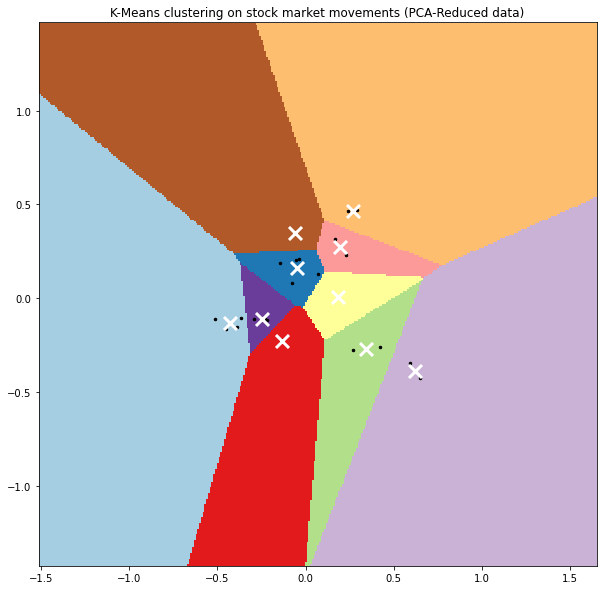

In [22]:
# Define step size of mesh
h = 0.01
# Plot the decision boundary
x_min,x_max = reduced_data[:,0].min()-1, reduced_data[:,0].max() + 1
y_min,y_max = reduced_data[:,1].min()-1, reduced_data[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
# Obtain labels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# Define color plot
cmap = plt.cm.Paired
# Plotting figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z,interpolation = "nearest",extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect = "auto",origin = "lower")
plt.plot(reduced_data[:,0],reduced_data[:,1],"k.",markersize = 5)
# Plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker = "x",s = 169,linewidths = 3,color = "w",zorder = 10)
plt.title("K-Means clustering on stock market movements (PCA-Reduced data)")
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.savefig('pic8.png', dpi=300, bbox_inches='tight')
plt.show()